/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


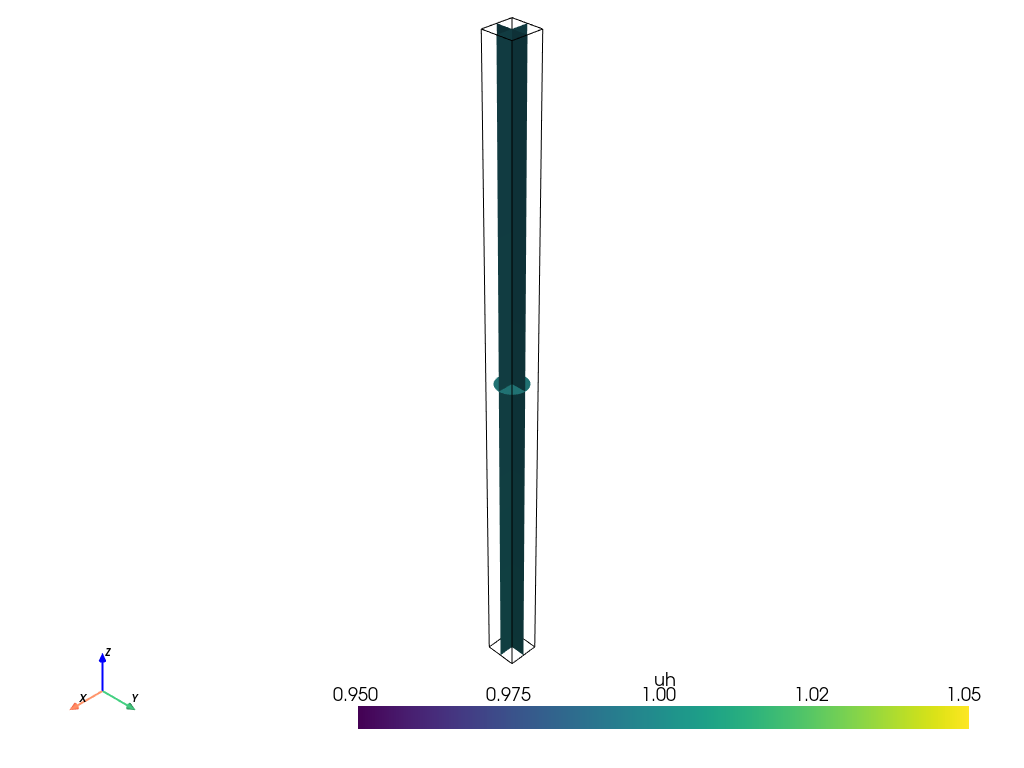

In [1]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

from review.utils.plotfunctions import plot_3d_solution
from review.utils.constants import ThreeDimExploration, Cases 
from review.lateral.solver import Steady3DSolver

def solve(case: str, version: str):
    cases = Cases()
    constants = ThreeDimExploration()
    filename = constants.get_base_path(version) / f"solution{case}.bp"
    solver = Steady3DSolver(cases.get_case_params(case),
                            constants.get_aspect_ratio(version),
                            constants.get_stomatal_radius(version),
                            constants.get_mesh_path(version),
                            stomatal_blur = constants.stomatal_epsilon,
                            filename = filename)
    solver.solve()


def plot(case: str, version: str):
    constants = ThreeDimExploration()
    filename = constants.get_base_path(version) / f"solution{case}.bp"
    plot_3d_solution(filename)

# for case in ["A", "B", "C", "D", "E"]:
#     for version in ["min", "mean", "max"]:
#         solve(case, version)
# 7 min...


plot("A", "min")


/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Case: A, Version: min, Relative Difference: 0.1%
Case: B, Version: min, Relative Difference: 1.9%
Case: C, Version: min, Relative Difference: 3.9%
Case: D, Version: min, Relative Difference: 4.5%
Case: E, Version: min, Relative Difference: 17.6%


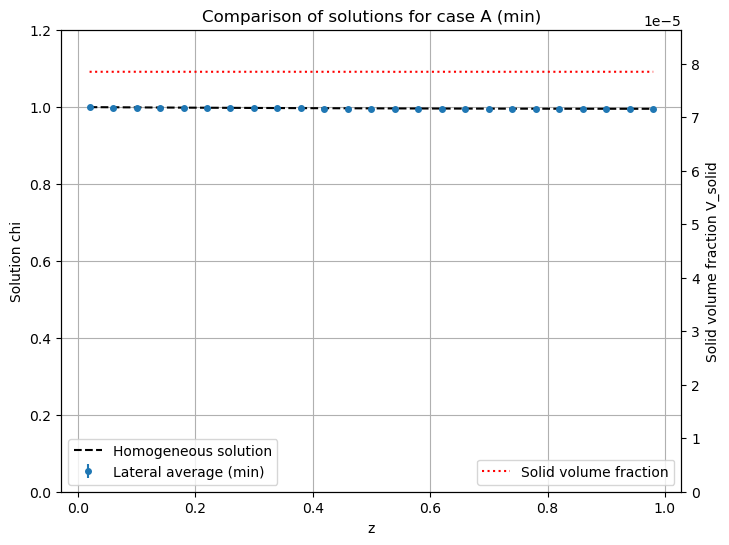

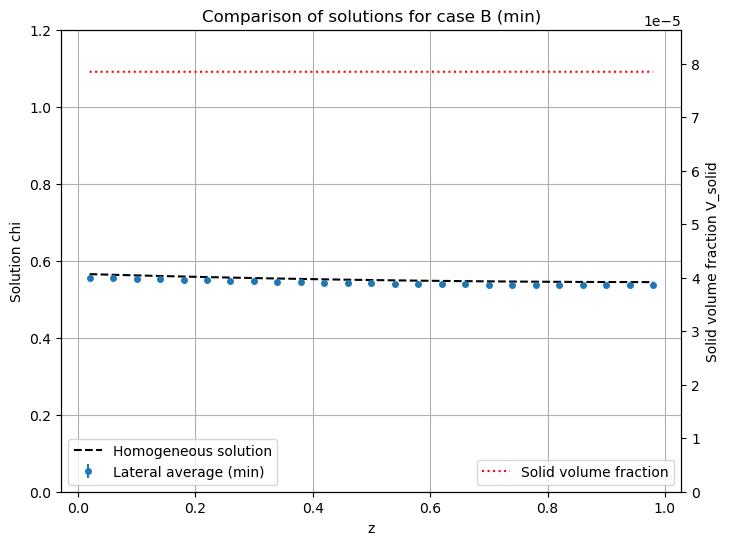

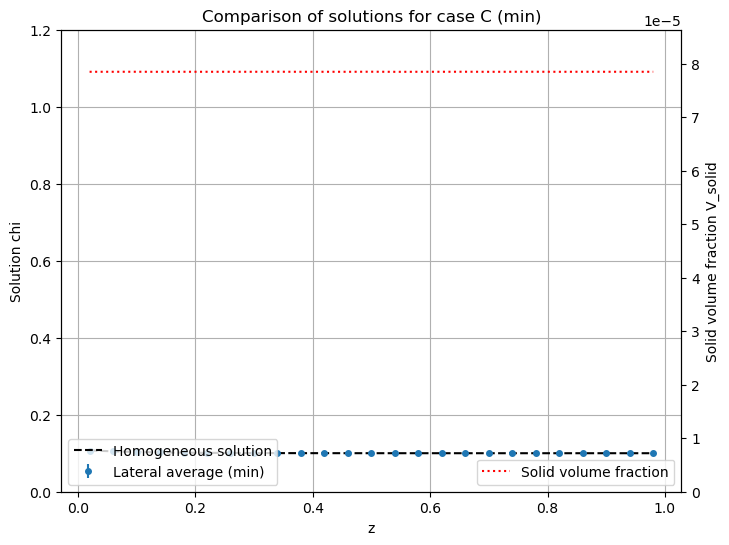

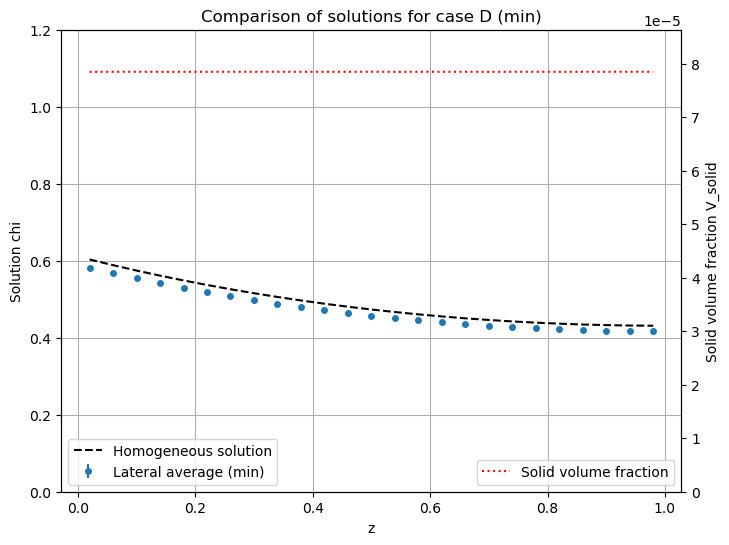

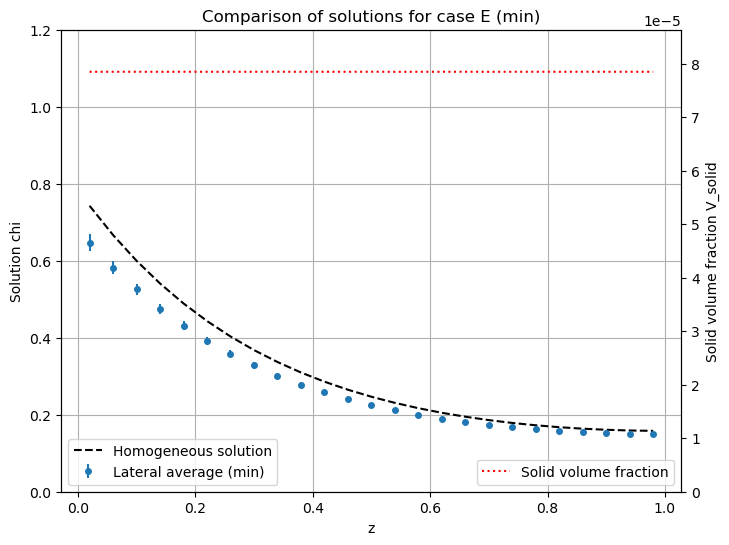

In [6]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW 

from review.utils.constants import ThreeDimExploration, Cases
from review.utils.homogeneous import homogeneous_solution
import matplotlib.pyplot as plt 
import numpy as np 

constants = ThreeDimExploration() 

versions = ["min", "mean", "max"]
cases = ["A", "B", "C", "D", "E"]

def get_rel_diff_for_version(version: str) -> None:
    rel_diffs = []
    cases = ["A", "B", "C", "D", "E"]
    for case in cases:
        filename = constants.get_base_path(version) / f"solution{case}_summary.txt"
        
        data = np.loadtxt(filename, delimiter=";")
        rel_diffs.append(data[2])  # Assuming the 4th column contains the relative differences
        print(f"Case: {case}, Version: {version}, Relative Difference: {100*data[2]:.1f}%")
    return cases, rel_diffs


def get_rel_diff_for_case(case: str) -> None:
    rel_diffs = []
    versions = ["min", "mean", "max"]
    for version in versions:
        filename = constants.get_base_path(version) / f"solution{case}_summary.txt"
        
        data = np.loadtxt(filename, delimiter=";")
        rel_diffs.append(data[2])  # Assuming the 4th column contains the relative differences
        print(f"Case: {case}, Version: {version}, Relative Difference: {100*data[2]:.1f}%")
    return versions, rel_diffs



def plot_1d_comparison(case: str, version: str) -> None:
    filename = constants.get_base_path(version) / f"solution{case}.txt"
    data = np.loadtxt(filename, delimiter=";")
    z = data[:, 0]
    V_solid = data[:, 1]
    chi_mean = data[:, 2]
    chi_std = data[:, 3]
    #
    cases = Cases() 
    tau, gamma, chi_ = cases.get_case_params(case)
    chi_hom = homogeneous_solution(z, (tau, gamma, chi_)) 
    #
    # rewrite with fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(z, chi_hom, label="Homogeneous solution", color="black", linestyle="--")
    ax.errorbar(z, chi_mean, yerr=chi_std, label=f"Lateral average ({version})", fmt='o', markersize=4)
    ax.set_xlabel("z")
    ax.set_ylabel("Solution chi")
    ax.set_title(f"Comparison of solutions for case {case} ({version})")
    ax.set_ylim(0, 1.2)
    ax.legend(loc="lower left")
    ax.grid()

    ax_ = ax.twinx()
    ax_.plot(z, V_solid, label="Solid volume fraction", color="red", linestyle=":")
    ax_.set_ylabel("Solid volume fraction V_solid")
    ax_.legend(loc='lower right')
    ax_.set_ylim(0, 1.1*np.max(V_solid))
    plt.show() 

version = "min"
get_rel_diff_for_version(version)
# get_rel_diff_for_case("E");

for case in ["A", "B", "C", "D", "E"]:
    plot_1d_comparison(case, version)


(0.0, 1.1)

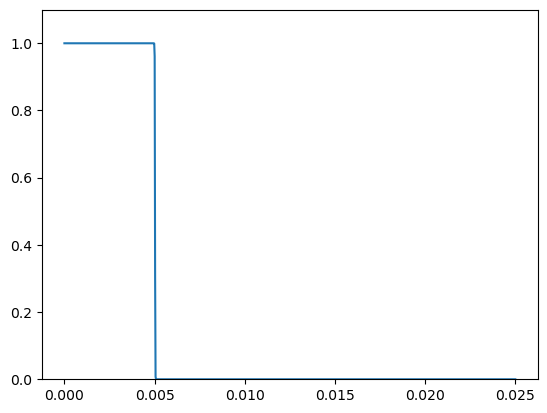

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

ratio = 0.201
a = 0.025 # 0.025, 0.152, 8.122
epsilon = 0.0002

x = np.linspace(0, a, 1000)
phi = x**2 - (ratio*a)**2 
gs = 0.5 * (1 - np.tanh(phi / epsilon / a**2))

plt.plot(x, gs)
plt.ylim(0, np.max(gs)*1.1)